In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [78]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings

In [79]:
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('insurance.csv')
print(df.shape)
df.head(2)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
np.isnan(df.select_dtypes(include=['int64','float64'])).sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

In [54]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [55]:
ll = LabelEncoder()
df['sex'] = ll.fit_transform(df['sex'])
df['smoker'] = ll.fit_transform(df['smoker'])

In [56]:
x = df.iloc[:,[0,1,2,4]]
y = df[['charges']]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [62]:
dtr1 = DecisionTreeRegressor()

dtr1.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
y_pred = dtr.predict(x_test)

mse1 = mean_squared_error(y_pred,y_test)
print(' mse  = ',mse1)
print(' rmse = ',np.sqrt(mse1))

 mse  =  46076169.34828866
 rmse =  6787.942939380727


In [72]:
rf1 = RandomForestRegressor(n_estimators=1500)
rf1.fit(x_train,y_train)


<ipython-input-72-485dc6e6dc0a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1500)

In [73]:
y_pred = rf1.predict(x_test)

mse2 = mean_squared_error(y_pred,y_test)
print(' mse  = ',mse2)
print(' rmse = ',np.sqrt(mse2))

 mse  =  25018500.393168252
 rmse =  5001.84969717886


In [80]:
n_est = list()
mselst = list()
rmselst = list()

for i in tqdm(range(100,2001,50)):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    n_est.append(i)
    mselst.append(mean_squared_error(y_pred,y_test))
    rmselst.append(np.sqrt(mean_squared_error(y_pred,y_test)))

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [03:45<00:00,  5.79s/it]


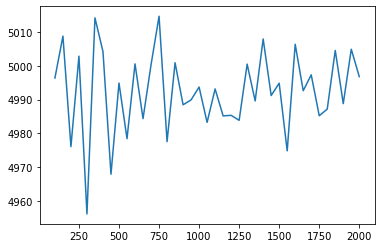

In [83]:
plt.plot(n_est,rmselst)

In [87]:
n_est_2 = list()
mselst_2 = list()
rmselst_2 = list()

for i in tqdm(range(250,276,1)):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    n_est_2.append(i)
    mselst_2.append(mean_squared_error(y_pred,y_test))
    rmselst_2.append(np.sqrt(mean_squared_error(y_pred,y_test)))

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:38<00:00,  1.47s/it]


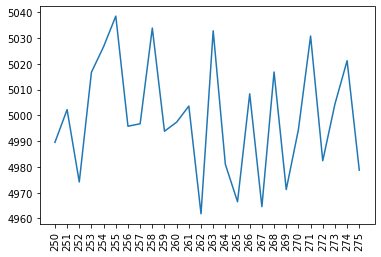

In [90]:
plt.plot(n_est_2,rmselst_2)
plt.xticks(range(250,276,1),rotation=90)
plt.show()

In [93]:
rf262 = RandomForestRegressor(n_estimators=262)
rf262.fit(x_train,y_train)
y_pred = rf262.predict(x_test)

np.sqrt(mean_squared_error(y_pred,y_test))

4982.2537187454145